In [1]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.firefox.options import Options as FirefoxOptions
from bs4 import BeautifulSoup
import csv
import time

# Set Firefox options
firefox_options = FirefoxOptions()
# You can add Firefox specific options here if needed, similar to what was done for Chrome

# List of brands
brand_list = ['bananarepublic', 'oldnavy', 'zara', 'hm', 'shein', 'uniqlo', 'levi', 'jcrew', 'forever21']

with open('brand-reviews.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Brand", "Parameter", "Rating", "Review Count"])
    
    for brand in brand_list:
        url_check = "https://www.sitejabber.com/reviews/" + brand + ".com"
        
        # Initialize the Firefox browser with the set options
        browser = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=firefox_options)
        browser.get(url_check)
        time.sleep(3)
        
        html_content = browser.page_source
        
        while html_content.find('url-overview__ratings__item') != -1:
            soup = BeautifulSoup(html_content, 'html.parser')
            
            label = soup.find('span', class_='url-overview__ratings__item__label')
            label_text = label.text
            
            rating = soup.find('div', class_='url-overview__ratings__item__stars')
            rating_str = str(rating)
            star_s_index = rating_str.find('data-rating')
            star = rating_str[star_s_index + 13:star_s_index + 16]
            
            review_count = soup.find('span', class_='url-overview__ratings__item__count')
            review_count_text = review_count.text
            
            html1_s_index = html_content.find('__item__count">')
            html1 = html_content[html1_s_index + 22:]
            html_content = html1
            
            if brand == 'hm':
                brand_name = 'H & M'
            else:
                brand_name = brand.capitalize()
            
            writer.writerow([brand_name, label_text, star, review_count_text])
        
        # Close the browser for the current brand before moving to the next one
        browser.quit()


C:\Users\PC\AppData\Local\Temp\ipykernel_9192\1154255066.py:24: DeprecationWarning: Firefox will soon stop logging to geckodriver.log by default; Specify desired logs with log_output
  browser = webdriver.Firefox(service=Service(GeckoDriverManager().install()), options=firefox_options)


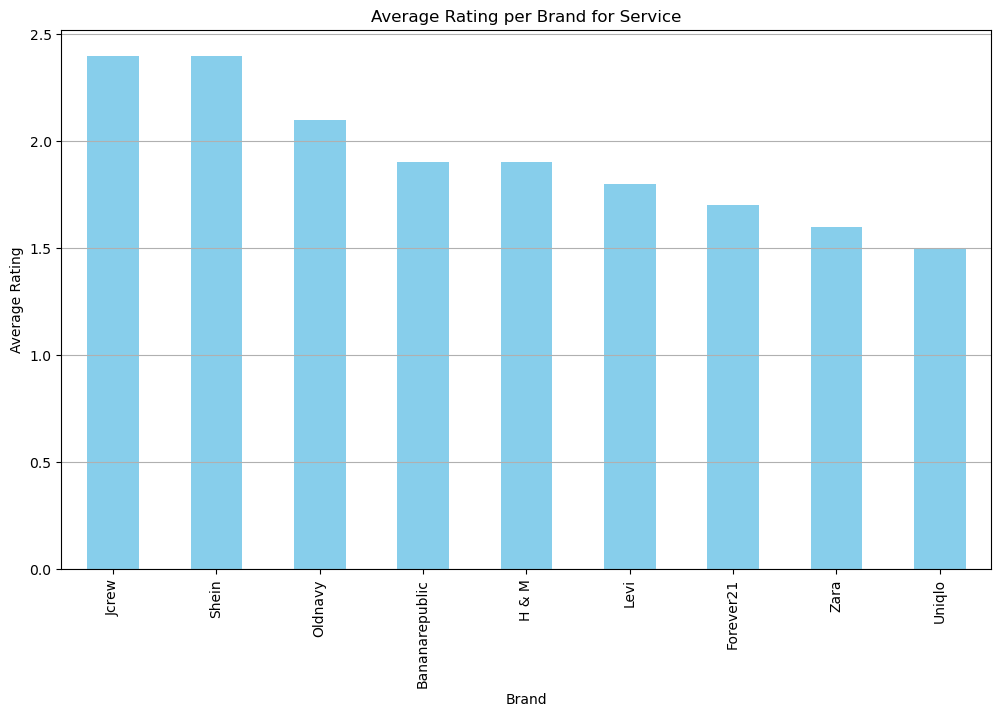

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
brand_reviews_df = pd.read_csv('brand-reviews.csv')

# Convert Rating column to numeric, setting errors='coerce' to turn invalid parsing into NaN
brand_reviews_df['Rating'] = pd.to_numeric(brand_reviews_df['Rating'], errors='coerce')

# Handle NaN values by filling with the mean of the column
brand_reviews_df['Rating'].fillna(brand_reviews_df['Rating'].mean(), inplace=True)

filtered_df = brand_reviews_df[brand_reviews_df['Parameter'] == 'Service']

# Calculate average rating for each brand
average_rating_per_brand = filtered_df.groupby('Brand')['Rating'].mean()


# Plotting
plt.figure(figsize=(12, 7))
average_rating_per_brand.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.title('Average Rating per Brand for Service')
plt.grid(axis='y')
plt.show()

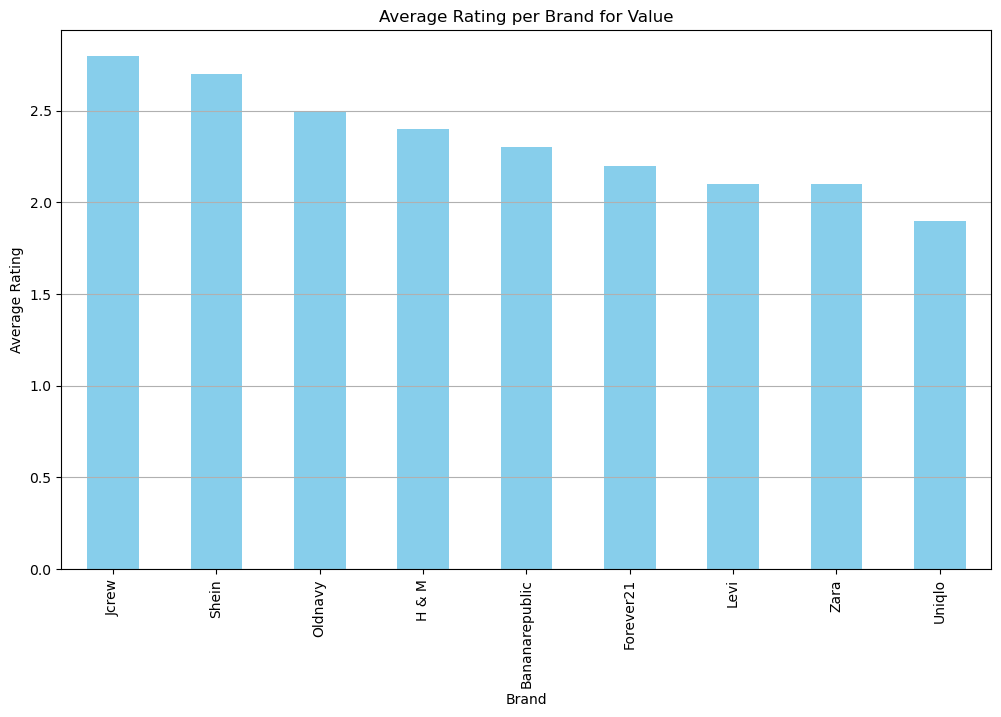

In [6]:
# Convert Rating column to numeric, setting errors='coerce' to turn invalid parsing into NaN
brand_reviews_df['Rating'] = pd.to_numeric(brand_reviews_df['Rating'], errors='coerce')

# Handle NaN values by filling with the mean of the column
brand_reviews_df['Rating'].fillna(brand_reviews_df['Rating'].mean(), inplace=True)

filtered_df = brand_reviews_df[brand_reviews_df['Parameter'] == 'Value']

# Calculate average rating for each brand
average_rating_per_brand = filtered_df.groupby('Brand')['Rating'].mean()


# Plotting
plt.figure(figsize=(12, 7))
average_rating_per_brand.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.title('Average Rating per Brand for Value')
plt.grid(axis='y')
plt.show()

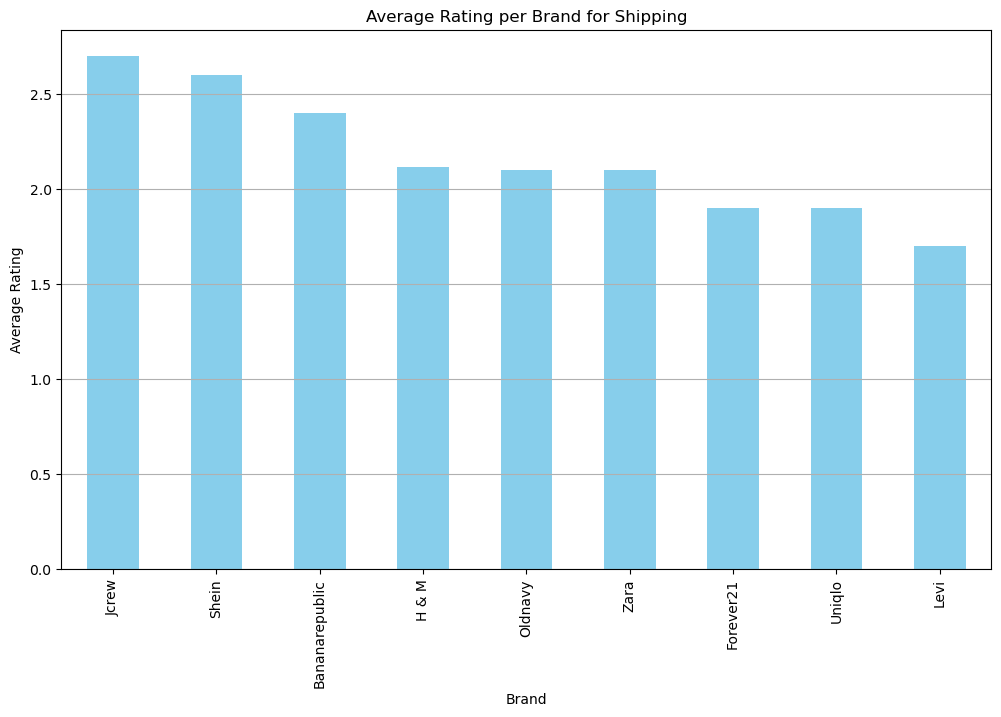

In [7]:
# Convert Rating column to numeric, setting errors='coerce' to turn invalid parsing into NaN
brand_reviews_df['Rating'] = pd.to_numeric(brand_reviews_df['Rating'], errors='coerce')

# Handle NaN values by filling with the mean of the column
brand_reviews_df['Rating'].fillna(brand_reviews_df['Rating'].mean(), inplace=True)

filtered_df = brand_reviews_df[brand_reviews_df['Parameter'] == 'Shipping']

# Calculate average rating for each brand
average_rating_per_brand = filtered_df.groupby('Brand')['Rating'].mean()


# Plotting
plt.figure(figsize=(12, 7))
average_rating_per_brand.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.title('Average Rating per Brand for Shipping')
plt.grid(axis='y')
plt.show()

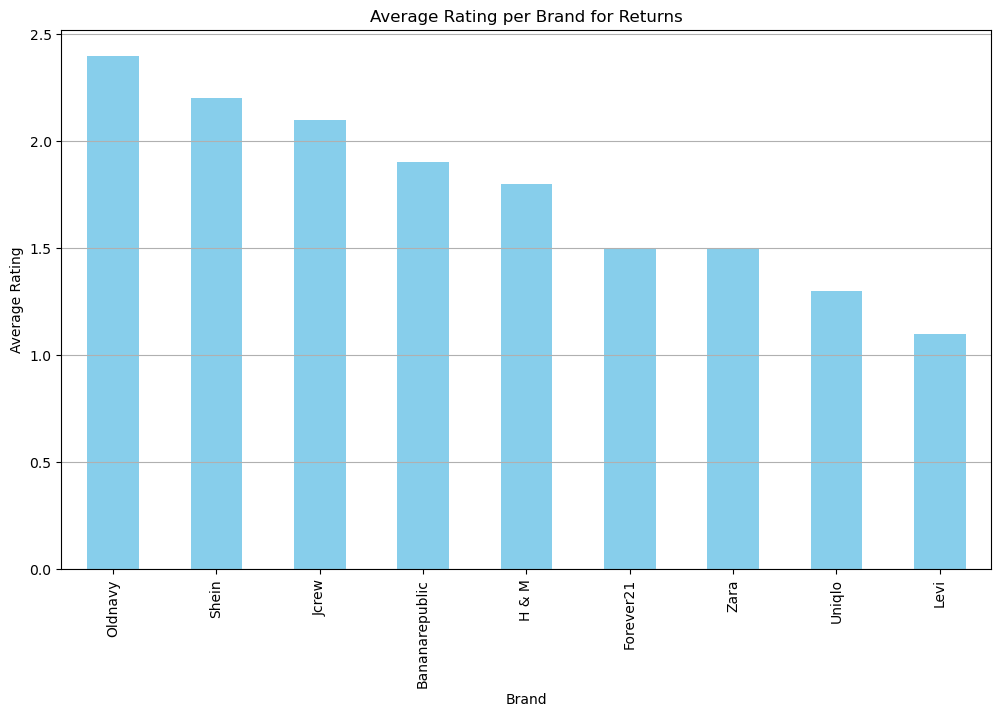

In [8]:
# Convert Rating column to numeric, setting errors='coerce' to turn invalid parsing into NaN
brand_reviews_df['Rating'] = pd.to_numeric(brand_reviews_df['Rating'], errors='coerce')

# Handle NaN values by filling with the mean of the column
brand_reviews_df['Rating'].fillna(brand_reviews_df['Rating'].mean(), inplace=True)

filtered_df = brand_reviews_df[brand_reviews_df['Parameter'] == 'Returns']

# Calculate average rating for each brand
average_rating_per_brand = filtered_df.groupby('Brand')['Rating'].mean()


# Plotting
plt.figure(figsize=(12, 7))
average_rating_per_brand.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.title('Average Rating per Brand for Returns')
plt.grid(axis='y')
plt.show()

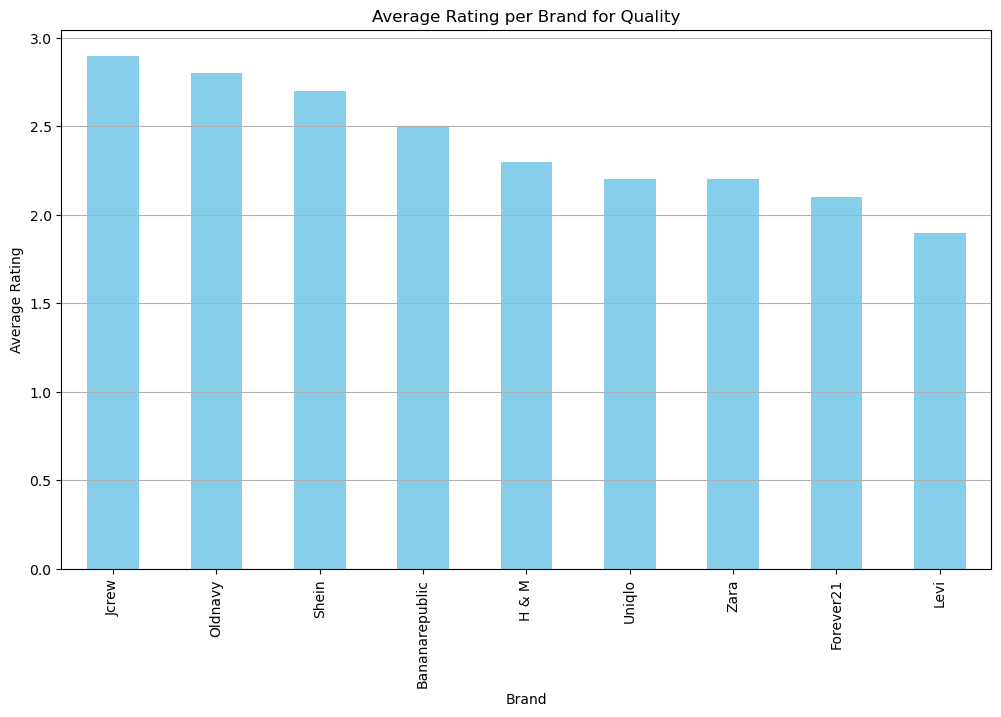

In [9]:
# Convert Rating column to numeric, setting errors='coerce' to turn invalid parsing into NaN
brand_reviews_df['Rating'] = pd.to_numeric(brand_reviews_df['Rating'], errors='coerce')

# Handle NaN values by filling with the mean of the column
brand_reviews_df['Rating'].fillna(brand_reviews_df['Rating'].mean(), inplace=True)

filtered_df = brand_reviews_df[brand_reviews_df['Parameter'] == 'Quality']

# Calculate average rating for each brand
average_rating_per_brand = filtered_df.groupby('Brand')['Rating'].mean()


# Plotting
plt.figure(figsize=(12, 7))
average_rating_per_brand.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.ylabel('Average Rating')
plt.xlabel('Brand')
plt.title('Average Rating per Brand for Quality')
plt.grid(axis='y')
plt.show()